In [ ]:
import jax
import jax.numpy as jnp
import numpy as np

In [ ]:
# Crear arreglo de entrada
inputs = jnp.array([x for x in range(-10, 20)], dtype=jnp.float64)

<ipython-input-2-7afb357e7a15>:1: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  inputs = jnp.array([x for x in range(-10, 20)], dtype=jnp.float64)


In [ ]:
inputs

Array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.], dtype=float32)

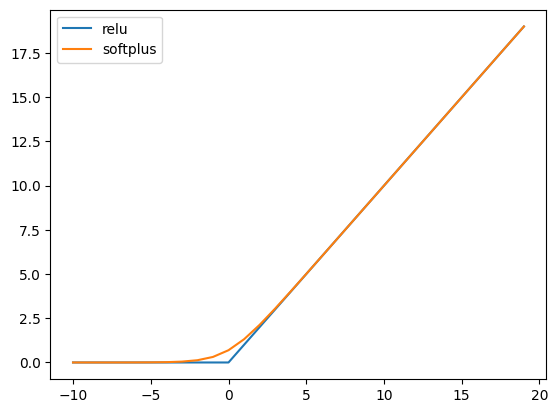

In [ ]:
import matplotlib.pyplot as plt
import jax.nn as nn
plt.plot(inputs, nn.relu(inputs), label='relu')

plt.plot(inputs, nn.softplus(inputs), label='softplus')

plt.legend()

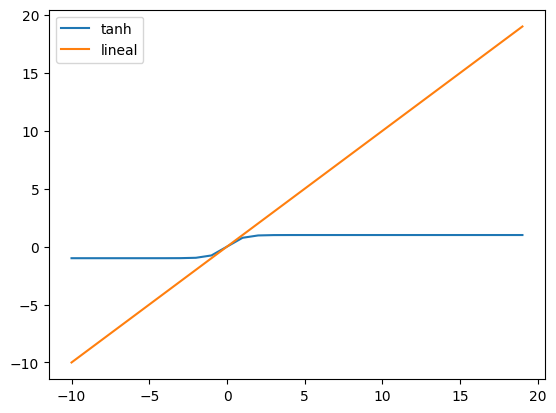

In [ ]:
def linear(y_pred):
  return y_pred

plt.plot(inputs, nn.tanh(inputs),label='tanh')  # Tangente hiperbólica: salida entre -1 y 1
plt.plot(inputs, linear(inputs),label='lineal')  # Activación lineal (sin modificar)
plt.legend()

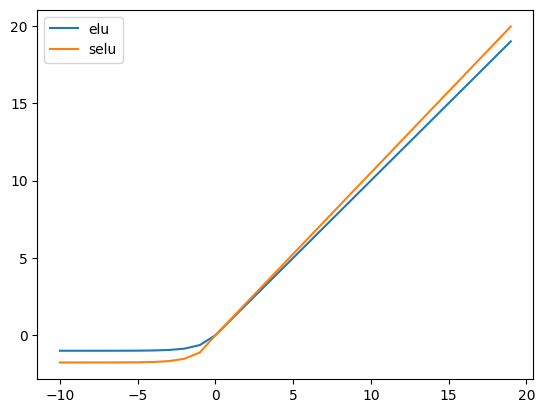

In [ ]:
plt.plot(inputs, nn.elu(inputs),label='elu')   # Exponential Linear Unit: negativo exponencialmente suave, positivo lineal
plt.plot(inputs, nn.selu(inputs),label='selu')  # Scaled ELU: versión escalada para normalización automática
plt.legend()

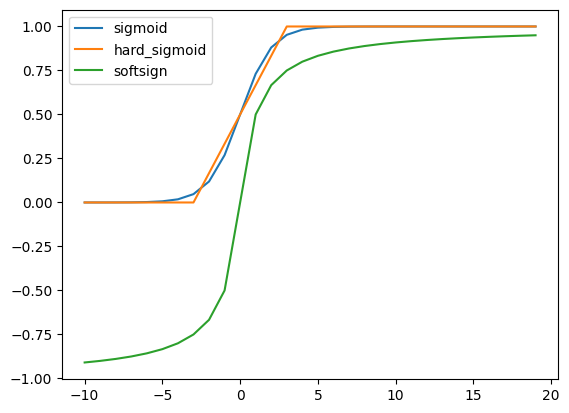

In [ ]:
plt.plot(inputs, nn.sigmoid(inputs), label='sigmoid')  # Sigmoide clásico: salida entre 0 y 1
plt.plot(inputs, nn.hard_sigmoid(inputs),label='hard_sigmoid')  # Aproximación lineal a la sigmoid
plt.plot(inputs, nn.soft_sign(inputs),label='softsign')  # Softsign: x/(1+|x|)
plt.legend()

In [ ]:
z = jnp.array([[1,1.2,1.8,2],[3,4.2,5.8,9]], dtype = jnp.float32)  # Matriz de 2x3
nn.softmax(z, axis=1)

Array([[0.13956296, 0.17046258, 0.31060305, 0.37937143],
       [0.00235741, 0.00782689, 0.03876685, 0.9510488 ]], dtype=float32)

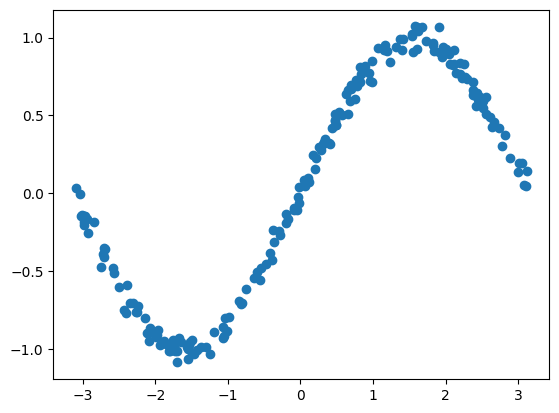

In [ ]:
N = 200  # Número de muestras
key = jax.random.PRNGKey(0)  # Semilla aleatoria

# Crear valores x aleatorios en [-π, π]
xs = jnp.array(sorted(jax.random.uniform(key=key, shape=N, minval=-jnp.pi, maxval=jnp.pi)))

# Valores y = sin(x) + ruido gaussiano
ys = jnp.sin(xs) + 0.05*jax.random.normal(key=key, shape=N)

# Gráfico de dispersión
plt.figure()
plt.scatter(xs, ys)

In [ ]:
!pip install jaxopt -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 5.5 MB/s eta 0:00:00


<ipython-input-11-025f4742e582>:21: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return jnp.array(poly.fit_transform(x.reshape(-1, 1)), dtype=jnp.float64)
<ipython-input-11-025f4742e582>:32: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'>  is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  params = random.normal(key, (X.shape[1],), dtype=jnp.float64) * 0.01


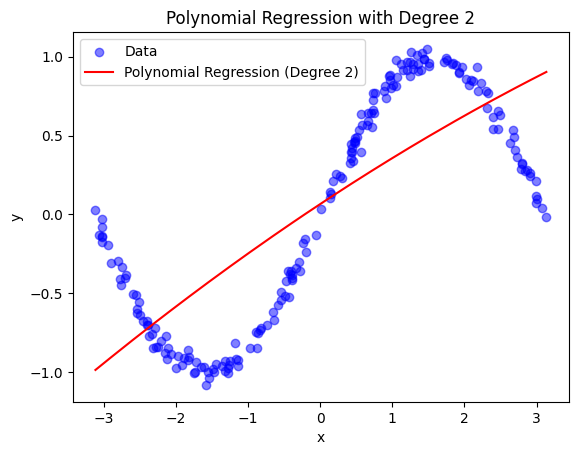

<ipython-input-11-025f4742e582>:21: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return jnp.array(poly.fit_transform(x.reshape(-1, 1)), dtype=jnp.float64)
<ipython-input-11-025f4742e582>:32: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'>  is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  params = random.normal(key, (X.shape[1],), dtype=jnp.float64) * 0.01


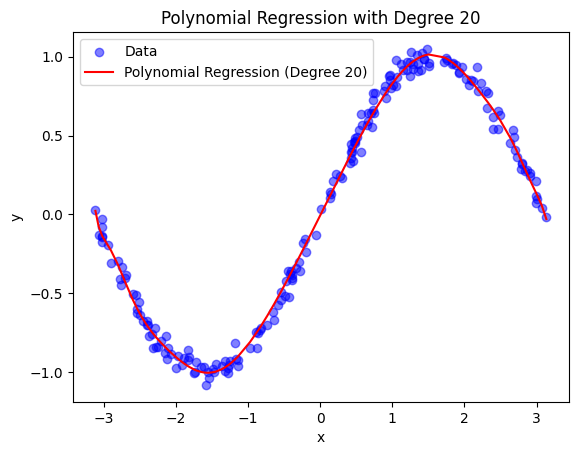

In [ ]:
import jax.numpy as jnp
import jax
import numpy as np
import matplotlib.pyplot as plt
from jax import random
from jaxopt import ScipyMinimize
from sklearn.preprocessing import PolynomialFeatures


# Generación de datos ruidosos tipo seno
def generate_data(n=200, noise=0.05, seed=0):
    np.random.seed(seed)  # Fijamos semilla para reproducibilidad
    xs = np.sort(np.random.uniform(low=-np.pi, high=np.pi, size=n))  # x entre -pi y pi
    ys = np.sin(xs) + np.random.normal(loc=0, scale=noise, size=n)  # y = sin(x) + ruido
    return jnp.array(xs), jnp.array(ys)  # Convertimos a tensores de JAX

# Ajusta un modelo de regresión polinómica y muestra el resultado
def polynomial_regression(xs, ys, degree, regularization=1e-3):
    # Función auxiliar que transforma los datos en variables polinómicas
    def polynomial_features(x, degree):
        poly = PolynomialFeatures(degree, include_bias=True)
        return jnp.array(poly.fit_transform(x.reshape(-1, 1)), dtype=jnp.float64)

    # Normalizamos las entradas y salidas para mejorar estabilidad numérica
    xs_mean, xs_std = jnp.mean(xs), jnp.std(xs) + 1e-8
    ys_mean, ys_std = jnp.mean(ys), jnp.std(ys) + 1e-8

    xs_norm = (xs - xs_mean) / xs_std
    ys_norm = (ys - ys_mean) / ys_std

    # Obtenemos la matriz de características polinómicas
    X = polynomial_features(xs_norm, degree)

    # Inicializamos los parámetros aleatoriamente con valores pequeños
    key = random.PRNGKey(0)
    params = random.normal(key, (X.shape[1],), dtype=jnp.float64) * 0.01

    # Función de pérdida: error cuadrático medio + regularización L2
    def loss_fn(params):
        y_pred = X @ params  # Predicción del modelo
        mse = jnp.mean((y_pred - ys_norm) ** 2)  # Error cuadrático medio
        l2_penalty = regularization * jnp.sum(params**2)  # Penalización L2
        return mse + l2_penalty  # Función de coste total

    # Optimizamos los parámetros con BFGS usando JAXopt
    optimizer = ScipyMinimize(fun=loss_fn, method="BFGS")
    result = optimizer.run(params)  # Ejecutamos la optimización
    params = result.params   # Extraemos los parámetros óptimos

    # Desnormalizamos las predicciones
    y_pred = X @ params * ys_std + ys_mean

    # Ordenamos las predicciones para trazar una curva continua
    xs_sorted, y_pred_sorted = zip(*sorted(zip(xs, y_pred)))

    # Graficamos los datos reales y el modelo ajustado
    plt.scatter(xs, ys, label="Data", color="blue", alpha=0.5)  # Datos originales
    plt.plot(xs_sorted, y_pred_sorted, label=f"Polynomial Regression (Degree {degree})", color="red")  # Curva ajustada
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Polynomial Regression with Degree {degree}")
    plt.show()

    return params

# Generamos datos sintéticos
xs, ys = generate_data(n=200, noise=0.05)

# Ajustamos un polinomio de grado 2 (subajuste probable)
params_degree_3 = polynomial_regression(xs, ys, degree=2)

# Ajustamos un polinomio de grado 20 (posible sobreajuste, controlado por regularización)
params_degree_20 = polynomial_regression(xs, ys, degree=20)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.W012EY_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.W012EY_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


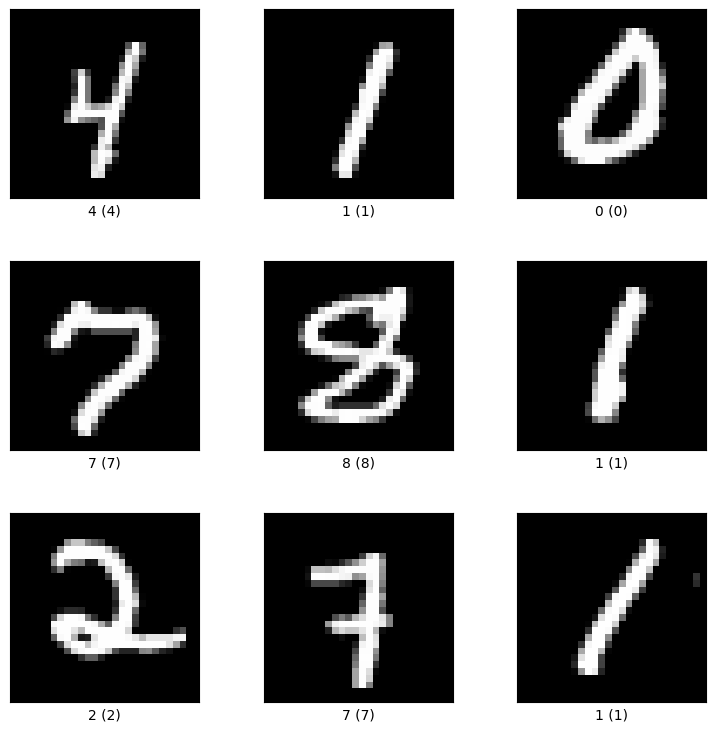

In [ ]:
# Importamos TensorFlow Datasets para acceder a MNIST fácilmente
import tensorflow_datasets as tfds


# Cargamos el dataset MNIST (solo el 10% para ejemplo), con info y ejemplos visuales
(ds_train_mnist, ds_test_mnist), ds_info_mnist = tfds.load(
  name = 'mnist',   # Nombre del dataset
  split=['train[:10%]', 'test[:10%]'],  # Cargamos solo el 10% del train y test
  shuffle_files=True,  # Mezclamos los archivos para aleatoriedad
  as_supervised=True,  # Devuelve tuplas (imagen, etiqueta)
  with_info=True)  # Devuelve información adicional (clases, etc.)

# Mostramos algunos ejemplos del dataset
fig = tfds.show_examples(ds_train_mnist, ds_info_mnist)

### Ejemplo con MNIST

In [ ]:
# Segundo bloque: preparación del pipeline de datos con tf.data

import tensorflow_datasets as tfds  # Cargamos nuevamente TFDS
import tensorflow as tf  # Importamos TensorFlow

# Fijamos semilla aleatoria para reproducibilidad
tf.random.set_seed(0)

# Definimos parámetros de entrenamiento
train_steps = 1200  # Número total de pasos de entrenamiento
eval_every = 200   #Evaluar cada 200 pasos
batch_size = 32  # Tamaño de batch


# Cargamos de nuevo el 10% del train y test set de MNIST
train_ds: tf.data.Dataset = tfds.load('mnist', split='train[:10%]')
test_ds: tf.data.Dataset = tfds.load('mnist', split='test[:10%]')


# Normalizamos el conjunto de entrenamiento: de [0, 255] a [0, 1]
train_ds = train_ds.map(
  lambda sample: {
    'image': tf.cast(sample['image'], tf.float32) / 255,
    'label': sample['label'],
  }
)

# Normalizamos el conjunto de prueba de la misma forma
test_ds = test_ds.map(
  lambda sample: {
    'image': tf.cast(sample['image'], tf.float32) / 255,
    'label': sample['label'],
  }
)

# Configuramos el dataset para entrenamiento eficiente

# Repetimos indefinidamente, mezclamos con buffer 1024 para aleatoriedad
train_ds = train_ds.repeat().shuffle(1024)

# Agrupamos en batches, descartamos incompletos, preparamos el siguiente batch en segundo plano.
train_ds = train_ds.batch(batch_size, drop_remainder=True).take(train_steps).prefetch(1)

# Preparamos también el dataset de prueba con batch y prefetch
test_ds = test_ds.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
train_ds

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(32, 28, 28, 1), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(32,), dtype=tf.int64, name=None)}>

In [ ]:
from flax import nnx  # Importamos NNX, una API de Flax para modelos neuronales
from functools import partial  # Para crear funciones parcialmente definidas

class CNN(nnx.Module):
  """A simple CNN model."""

  def __init__(self, *, rngs: nnx.Rngs):
    # Primera capa convolucional: de 1 canal a 32 mapas de características
    self.conv1 = nnx.Conv(1, 32, kernel_size=(3, 3), rngs=rngs)
    # Segunda capa convolucional: de 32 a 64 mapas de características
    self.conv2 = nnx.Conv(32, 64, kernel_size=(3, 3), rngs=rngs)
    # Capa de pooling promedio con ventana 2x2 y stride 2
    self.avg_pool = partial(nnx.avg_pool, window_shape=(2, 2), strides=(2, 2))
    # Capa totalmente conectada que aplana las activaciones
    self.linear1 = nnx.Linear(3136, 256, rngs=rngs)
    # Capa de salida: 10 clases (para MNIST)
    self.linear2 = nnx.Linear(256, 10, rngs=rngs)

  def __call__(self, x):
    # Aplicamos conv1 + ReLU + avg_pool
    x = self.avg_pool(nnx.relu(self.conv1(x)))
    # Aplicamos conv2 + ReLU + avg_pool
    x = self.avg_pool(nnx.relu(self.conv2(x)))
    # Aplanamos la salida para alimentar a las capas lineales
    x = x.reshape(x.shape[0], -1)
    # Capa lineal + ReLU
    x = nnx.relu(self.linear1(x))
    # Capa final (sin activación, porque softmax se aplica luego si es necesario)
    x = self.linear2(x)
    return x

# Creamos el modelo CNN con una semilla aleatoria
model = CNN(rngs=nnx.Rngs(0))
# Visualizamos su arquitectura
nnx.display(model)

In [ ]:
import jax.numpy as jnp  # JAX NumPy

#  Creamos una imagen de ejemplo con forma (1, 28, 28, 1): 1 imagen de MNIST en escala de grises
y = model(jnp.ones((1, 28, 28, 1)))
y

Array([[ 0.18405604,  0.5048598 ,  0.20095982,  0.48739713, -0.37915248,
        -0.55519223, -0.544814  , -0.04560174,  0.05879368,  0.13339695]],      dtype=float32)

### Funcion Accuracy

In [ ]:
# Generamos logits aleatorios con distribución normal y los pasamos por sigmoid
logits = jax.random.normal(jax.random.key(0), (5, 2))
logits = jax.nn.sigmoid(logits)
print(logits)

# Etiquetas reales para comparar (vector binario)
labels = jnp.array([0, 1, 1, 1, 0])

# Generamos un segundo conjunto de logits y etiquetas
logits2 = jax.random.normal(jax.random.key(1), (5, 2))
logits2 = jax.nn.sigmoid(logits2)

print(logits2)
labels2 = jnp.array([0, 1, 1, 1, 1])

# Instanciamos el objeto para calcular accuracy
metrics = nnx.metrics.Accuracy()
# Calculamos la precisión acumulada hasta ahora (aún sin actualizar)
metrics.compute()

[[0.83515924 0.8834242 ]
 [0.39326835 0.48035577]
 [0.5439093  0.27446428]
 [0.37864614 0.6211374 ]
 [0.6602367  0.27885193]]
[[0.46146724 0.5211642 ]
 [0.46605718 0.46131837]
 [0.7801717  0.5370066 ]
 [0.89487743 0.731584  ]
 [0.42792165 0.58863974]]


Array(nan, dtype=float32)

In [ ]:
# Actualizamos el métrico con logits2 y labels2
metrics.update(logits=logits2, labels=labels2)
# Recalculamos la precisión después de la actualización
metrics.compute()

Array(0.2, dtype=float32)

In [ ]:
import optax  # Librería de optimización para JAX

# Definimos la tasa de aprendizaje y el momentum
learning_rate = 0.005
momentum = 0.9

# Creamos el optimizador con AdamW (Adam con decaimiento de pesos)
optimizer = nnx.Optimizer(model, optax.adamw(learning_rate, momentum))

# Definimos múltiples métricas: precisión y promedio de pérdida
metrics = nnx.MultiMetric(
  accuracy=nnx.metrics.Accuracy(),
  loss=nnx.metrics.Average('loss'),
)

# Visualizamos el optimizador (estructura, parámetros, etc.)
nnx.display(optimizer)

In [ ]:
def loss_fn(model: CNN, batch):
  logits = model(batch['image'])  # Pasa las imágenes por el modelo para obtener las predicciones (logits)
  loss = optax.softmax_cross_entropy_with_integer_labels(  # Calcula la pérdida (cross-entropy)
    logits=logits, labels=batch['label']  # Usa las etiquetas reales y las predicciones
  ).mean()  # Toma el promedio sobre el batch
  return loss, logits  # Devuelve la pérdida y los logits (útil para métricas)

@nnx.jit  # Compila la función para que sea más rápida (jit = just-in-time compilation)
def train_step(model: CNN, optimizer: nnx.Optimizer, metrics: nnx.MultiMetric, batch):
  #Entrena por un solo paso
  print(type(batch['image']))  # Imprime el tipo de datos de la imagen (útil para depuración)
  # Calcula la pérdida y el gradiente; también devuelve un valor auxiliar (loss y logits)
  grad_fn = nnx.value_and_grad(loss_fn, has_aux=True)
  (loss, logits), grads = grad_fn(model, batch)
  print(grads)  # Muestra los gradientes calculados (útil para inspección)

  # Actualiza las métricas con los valores actuales
  metrics.update(loss=loss, logits=logits, labels=batch['label'])
  optimizer.update(grads)  # In-place updates.

@nnx.jit
def eval_step(model: CNN, metrics: nnx.MultiMetric, batch):
  loss, logits = loss_fn(model, batch)  # Calcula la pérdida y los logits
  metrics.update(loss=loss, logits=logits, labels=batch['label'])  # Actualiza métricas sin actualizar pesos

In [ ]:
def loss_with_aux(x):
    return x**2, x  # Retorna el resultado + un valor auxiliar

grad_fn = nnx.value_and_grad(loss_with_aux, has_aux=True)
grad_value, aux_value = grad_fn(3.0)  # La derivada y el auxiliar

print("Gradiente:", grad_value)  # Devuelve la derivada (2x = 6)
print("Auxiliar:", aux_value)  # Devuelve el valor auxiliar (3.0)


Gradiente: (Array(9., dtype=float32, weak_type=True), 3.0)
Auxiliar: 6.0


In [ ]:

from IPython.display import clear_output
import matplotlib.pyplot as plt

metrics_history = {
    'train_loss': [],  # Lista para almacenar las pérdidas en entrenamiento
    'train_accuracy': [],  # Lista para almacenar las precisiones en entrenamiento
    'test_loss': [],  # Lista para almacenar las pérdidas en validación/test
    'test_accuracy': []  # Lista para almacenar las precisiones en validación/test
}


for step, batch in enumerate(train_ds.as_numpy_iterator()):  # Itera sobre los batches del dataset de entrenamiento
  # Ejecuta un paso de entrenamiento: actualiza pesos, optimizador y métricas
  train_step(model, optimizer, metrics, batch)

  if step > 0 and (step % eval_every == 0 or step == train_steps - 1):  # Se evalúa cada 'eval_every' pasos o al final
    for metric, value in metrics.compute().items():  ## Calcula métricas (loss, accuracy, etc.)
      metrics_history[f'train_{metric}'].append(value)   # Guarda el valor en el historial
    metrics.reset()  # Reinicia métricas antes de procesar el conjunto de prueba

    for test_batch in test_ds.as_numpy_iterator():  # Recorre los batches del conjunto de prueba
      eval_step(model, metrics, test_batch)  # Evalúa el modelo sin modificar pesos


    for metric, value in metrics.compute().items():
      metrics_history[f'test_{metric}'].append(value)  # Guarda la métrica de test
    metrics.reset()  # Reinicia métricas para el proximo ciclo

    clear_output(wait=True)# Limpia la salida anterior para una gráfica limpia en notebooks

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.set_title('Loss')
    ax2.set_title('Accuracy')
    for dataset in ('train', 'test'):  # Para cada conjunto (entrenamiento y prueba)
      ax1.plot(metrics_history[f'{dataset}_loss'], label=f'{dataset}_loss')  # Gráfica de pérdidas
      ax2.plot(metrics_history[f'{dataset}_accuracy'], label=f'{dataset}_accuracy')  # Gráfica de precisión
    ax1.legend()
    ax2.legend()
    plt.show()

<class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>
State({
  'conv1': {
    'bias': VariableState( # 32 (128 B)
      type=Param,
      value=Traced<ShapedArray(float32[32])>with<DynamicJaxprTrace>
    ),
    'kernel': VariableState( # 288 (1.2 KB)
      type=Param,
      value=Traced<ShapedArray(float32[3,3,1,32])>with<DynamicJaxprTrace>
    )
  },
  'conv2': {
    'bias': VariableState( # 64 (256 B)
      type=Param,
      value=Traced<ShapedArray(float32[64])>with<DynamicJaxprTrace>
    ),
    'kernel': VariableState( # 18,432 (73.7 KB)
      type=Param,
      value=Traced<ShapedArray(float32[3,3,32,64])>with<DynamicJaxprTrace>
    )
  },
  'linear1': {
    'bias': VariableState( # 256 (1.0 KB)
      type=Param,
      value=Traced<ShapedArray(float32[256])>with<DynamicJaxprTrace>
    ),
    'kernel': VariableState( # 802,816 (3.2 MB)
      type=Param,
      value=Traced<ShapedArray(float32[3136,256])>with<DynamicJaxprTrace>
    )
  },
  'linear2': {
    'bias': Variable

In [ ]:
model.eval()  # Cambia el modelo a modo evaluación (desactiva dropout, batchnorm, etc.)

@nnx.jit
def pred_step(model: CNN, batch):
  logits = model(batch['image'])  # Calcula los logits a partir de las imágenes
  return logits.argmax(axis=1)  # Devuelve las clases predichas (argmax sobre logits)

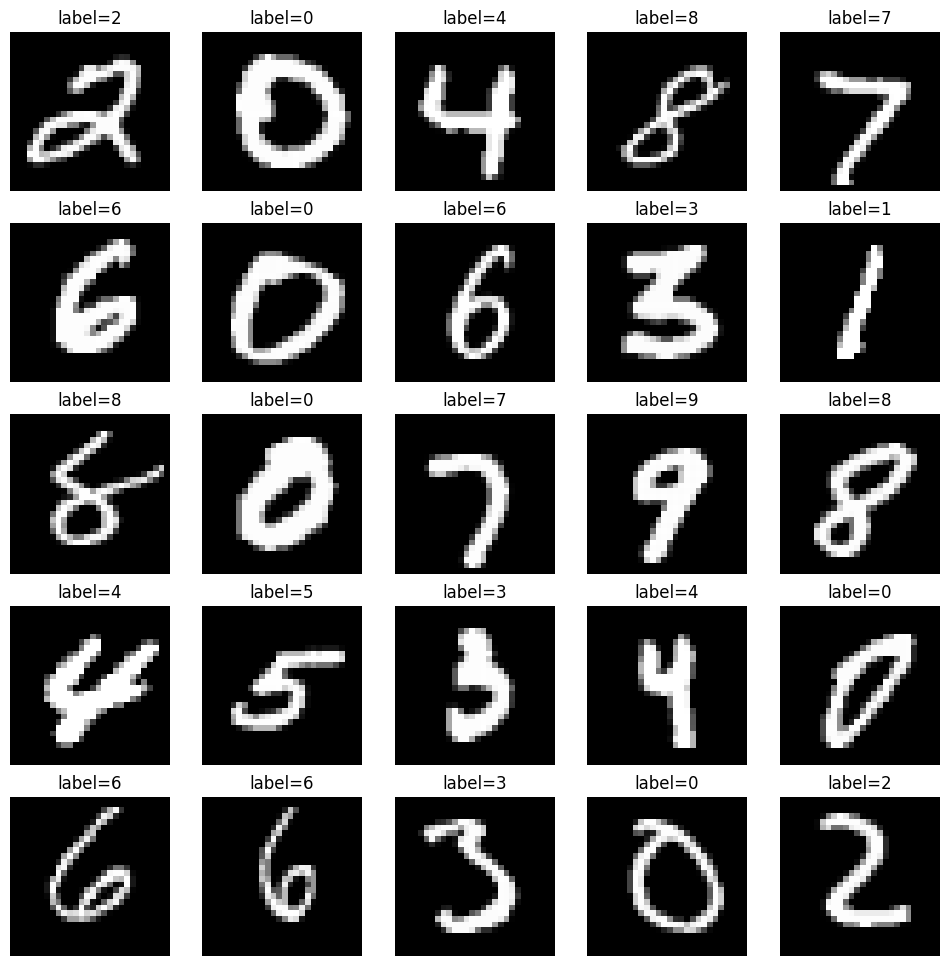

In [ ]:
test_batch = test_ds.as_numpy_iterator().next()  # Obtiene un batch del conjunto de prueba
pred = pred_step(model, test_batch)  # Obtiene las predicciones del modelo

fig, axs = plt.subplots(5, 5, figsize=(12, 12))  # Crea una cuadrícula de 5x5 para visualizar 25 imágenes

for i, ax in enumerate(axs.flatten()):  # Recorre cada subgráfico
    ax.imshow(test_batch['image'][i, ..., 0], cmap='gray')  # Muestra la imagen en escala de grises
    ax.set_title(f'Label={pred[i]}')  # Muestra la etiqueta predicha
    ax.axis('off')  # Oculta ejes


In [ ]:
df.plot()   # Grafica el DataFrame (ej. series de manchas solares)
plt.show()

In [ ]:
time_index = np.array(df['Date'])  # Índice temporal (eje X)
data = np.array(df['Monthly Mean Total Sunspot Number'])  # Datos (eje Y)
print(time_index.shape)  # Tamaño del vector de fechas
print(data.shape)  # Tamaño del vector de datos

In [ ]:
# Hiperparámetros para entrenamiento y creación de ventanas
SPLIT_TEST_TRAIN = 0.8  # Porcentaje de datos para entrenamiento
WINDOW_SIZE = 60  # Tamaño de ventana deslizante (ej. 60 meses)
BATCH_SIZE = 32  # Tamaño del lote de entrenamiento
SHUFFLE_BUFFER = 1000  # Tamaño del buffer para mezclar datos

In [ ]:
split_index = int(SPLIT_TEST_TRAIN * data.shape[0])  # Índice de corte (80% de los datos)
print(split_index)  # Imprime el índice donde se divide el dataset

In [ ]:
# Entrenamiento
train_data = data[:split_index]
train_time = time_index[:split_index]

# Prueba
test_data = data[split_index:]
test_time = time_index[split_index:]

In [ ]:
def ts_data_timeseries(data, window_size, batch_size):
    ds = tf.data.Dataset.from_tensor_slices(data)  # Convierte array NumPy a dataset de TensorFlow

    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)  # Crea ventanas deslizantes (tamaño + 1 para incluir la etiqueta)
    ds = ds.flat_map(lambda window: window.batch(window_size + 1))  # Convierte ventanas en batches

    # Divide cada ventana: los primeros window_size valores son la entrada, el último es la etiqueta
    ds = ds.map(lambda window: (window[:-1], window[-1]))

    ds = ds.batch(batch_size).prefetch(1)  # Agrupa en batches y hace prefetch para eficiencia
    return ds


In [ ]:
train_dataset = ts_data_timeseries(train_data, WINDOW_SIZE, BATCH_SIZE)
test_dataset = ts_data_timeseries(test_data, WINDOW_SIZE, BATCH_SIZE)

In [ ]:
 for ds in train_dataset.take(1):
    print(ds)  # Muestra un lote de entrenamiento (entrada y etiqueta)

In [ ]:
class MLP(nnx.Module):
    # Modelo MLP simple, equivalente a Keras.Sequential

    def __init__(self, *, rngs: nnx.Rngs):
        self.dense1 = nnx.Linear(WINDOW_SIZE, 20, rngs=rngs)  # Capa densa 1
        self.dense2 = nnx.Linear(20, 10, rngs=rngs)  # Capa densa 2
        self.dense3 = nnx.Linear(10, 1, rngs=rngs)  # Capa de salida

    def __call__(self, x):
        x = nnx.relu(self.dense1(x))  # Activación ReLU
        x = nnx.relu(self.dense2(x))
        x = self.dense3(x)   # Salida final sin activación (regresión)
        return x

# Instanciar el modelo
model = MLP(rngs=nnx.Rngs(0))  # Se inicializa con una semilla para reproducibilidad

# Visualizarlo
nnx.display(model)  # Muestra estructura y parámetros del modelo

In [ ]:
x_testeo = jnp.ones((1, WINDOW_SIZE))  # Entrada de prueba: un vector con unos
y = model(x_testeo)  # Salida del modelo
y

In [ ]:
import optax  # Biblioteca de funciones de optimización compatible con JAX

learning_rate = 1e-4
momentum = 0.9

# Define el optimizador usando AdamW
optimizer = nnx.Optimizer(model, optax.adamw(learning_rate, momentum))

# Define métricas: precisión y pérdida promedio
metrics = nnx.MultiMetric(
    accuracy=nnx.metrics.Accuracy(),
    loss=nnx.metrics.Average('loss'),
)

nnx.display(optimizer)  # Muestra información del optimizador


In [ ]:
def loss_fn(model: MLP, batch):
  # Se realiza una inferencia del modelo sobre los datos de entrada (batch[0])
  logits = model(batch[0])

  # Se calcula la pérdida usando entropía cruzada con etiquetas enteras.
  # 'logits' son las salidas sin activar del modelo (antes de aplicar softmax)
  # 'labels' son las clases verdaderas (batch[1])
  loss = optax.softmax_cross_entropy_with_integer_labels(
    logits=logits, labels=batch[1]
  ).mean() # Promediamos la pérdida en el batch
  # Se retorna tanto la pérdida como los logits para uso posterior
  return loss, logits

@nnx.jit
def train_step(model: MLP, optimizer: nnx.Optimizer, metrics: nnx.MultiMetric, batch):

  # Calculamos tanto el valor de la pérdida como su gradiente respecto al modelo
  grad_fn = nnx.value_and_grad(loss_fn, has_aux=True)
  # Ejecutamos la función con gradientes
  (loss, logits), grads = grad_fn(model, batch)
  # Actualizamos las métricas de entrenamiento con los valores actuales de pérdida, logits y etiquetas reales
  metrics.update(loss=loss, logits=logits, labels=batch[1])
  # Aplicamos los gradientes al modelo mediante el optimizador para actualizar sus parámetros
  optimizer.update(grads)

@nnx.jit
def eval_step(model: MLP, metrics: nnx.MultiMetric, batch):
  # Se calcula la pérdida y logits sin gradientes, ya que no estamos entrenando, solo evaluando
  loss, logits = loss_fn(model, batch)
  # Se actualizan las métricas con la salida del modelo y las etiquetas verdaderas
  metrics.update(loss=loss, logits=logits, labels=batch[1])

In [ ]:
import jax
import jax.numpy as jnp
import optax
from flax import linen as nn  # Usamos linen para definir la red
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output


# 1. Definir el modelo con NNX (flax.linen en lugar de flax.nn)

class MLP(nn.Module):
    def setup(self):
        self.dense1 = nn.Dense(20)  # Primera capa con 20 neuronas
        self.dense2 = nn.Dense(10)  # Segunda capa con 10 neuronas
        self.dense3 = nn.Dense(1)  # Salida (regresión, 1 valor)

    def __call__(self, x):
        # Función de propagación hacia adelante (forward pass)
        x = nn.relu(self.dense1(x))  # ReLU después de la primera capa
        x = nn.relu(self.dense2(x))  # ReLU después de la segunda capa
        x = self.dense3(x)  # Capa de salida sin activación (para regresión)
        return x

# Creamos una instancia del modelo
model = MLP()

def ts_data_timeseries(data, window_size, batch_size):
    ds = tf.data.Dataset.from_tensor_slices(data)  # Convierte el array en dataset de TensorFlow
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)  # Crea ventanas deslizantes
    ds = ds.flat_map(lambda window: window.batch(window_size + 1))  # Convierte cada ventana en batch
    ds = ds.map(lambda window: (window[:-1], window[-1]))  # Entrada: window[:-1], Etiqueta: window[-1]
    ds = ds.batch(batch_size).prefetch(1)  # Agrupamos en lotes y usamos prefetch
    return ds

# Preparación de datasets de entrenamiento y prueba
train_dataset = ts_data_timeseries(train_data, WINDOW_SIZE, BATCH_SIZE)
test_dataset = ts_data_timeseries(test_data, WINDOW_SIZE, BATCH_SIZE)

# Inicialización del optimizador (Adam)
optimizer = optax.adam(learning_rate=1e-4)

rng = jax.random.PRNGKey(0)  # Semilla aleatoria
x_dummy = jnp.ones((1, WINDOW_SIZE))  # Dummy input para inicializar el modelo
params = model.init(rng, x_dummy)  # Inicialización de pesos

# Inicialización del estado del optimizador
opt_state = optimizer.init(params)

@jax.jit
def train_step(params, opt_state, x, y):
    def loss_fn(params):
        y_pred = model.apply(params, x)
        loss = jnp.mean(jnp.square(y - y_pred))  # MSE como función de pérdida
        return loss

    # Calculamos el gradiente de la función de pérdida
    loss, grads = jax.value_and_grad(loss_fn)(params)

    # Actualizamos los parámetros usando el optimizador
    updates, opt_state = optimizer.update(grads, opt_state)
    new_params = optax.apply_updates(params, updates)

    return loss, new_params, opt_state

# Entrenamiento del modelo
EPOCHS = 40
eval_every = 120
metrics_history = {'train_loss': [], 'test_loss': []}

# Ciclo de entrenamiento
for epoch in range(EPOCHS):
    print(f"Época {epoch+1}/{EPOCHS}")

    # Entrenamiento
    for step, (x_batch, y_batch) in enumerate(train_dataset.as_numpy_iterator()):
      # Convertimos a tensores JAX
        x_batch, y_batch = jnp.array(x_batch), jnp.array(y_batch)
        # Entrenamos el modelo en este batch
        loss, params, opt_state = train_step(params, opt_state, x_batch, y_batch)

        # Guardamos pérdida de entrenamiento periódicamente
        if step % eval_every == 0:
            metrics_history['train_loss'].append(float(loss))
            print(f"Paso {step}, Pérdida: {loss:.4f}")

    # Evaluación sin necesidad de conocer el tamaño total del dataset
    test_loss = 0
    total_samples = 0
    for x_test, y_test in test_dataset.as_numpy_iterator():
        x_test, y_test = jnp.array(x_test), jnp.array(y_test)
        y_pred = model.apply(params, x_test)
        test_loss += jnp.sum(jnp.square(y_test - y_pred))  # Acumulamos pérdida total
        total_samples += x_test.shape[0]


    test_loss /= total_samples  # Promediamos la pérdida
    metrics_history['test_loss'].append(float(test_loss))

    # Gráficos en tiempo real
    clear_output(wait=True)
    plt.figure(figsize=(10, 5))
    plt.plot(metrics_history['train_loss'], label='Train Loss')
    plt.plot(metrics_history['test_loss'], label='Test Loss')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Función para mostrar predicciones del modelo
def show_predictions(model, params, test_dataset):
    real_values = []  # Aquí almacenamos los valores reales (etiquetas)
    predicted_values = []  # Aquí almacenamos las predicciones del modelo

    # Hacer predicciones
    # Iteramos sobre el dataset de prueba
    for x_test, y_test in test_dataset.as_numpy_iterator():
        # Convertimos los lotes a arreglos JAX
        x_test, y_test = jnp.array(x_test), jnp.array(y_test)

        # Aplicamos el modelo para obtener la predicción
        y_pred = model.apply(params, x_test)

        # Guardamos valores reales y predichos
        real_values.append(y_test)
        predicted_values.append(y_pred)

    # Concatenamos todas las predicciones en un solo array para graficar
    real_values = np.concatenate(real_values, axis=0)
    predicted_values = np.concatenate(predicted_values, axis=0)

    # Visualización de resultados
    plt.figure(figsize=(12, 6))
    plt.plot(real_values, label='Real values')
    plt.plot(predicted_values, label='Predicted values', color='orange')
    plt.title("Real vs Predicted values")
    plt.xlabel("Index")
    plt.ylabel("Sunspot Number")
    plt.legend()
    plt.show()

# Ejecutamos la función para visualizar resultados
show_predictions(model, params, test_dataset)

In [ ]:
import os

# Establecemos el backend de Keras a JAX (necesario para compatibilidad)
os.environ["KERAS_BACKEND"] = "jax"

# Importaciones necesarias
import jax  # Computación acelerada en GPU/TPU
import tensorflow as tf  # Solo se usa para manejo de datos (tf.data)
import keras  # API de alto nivel (usada si se integra con JAX)
import numpy as np  # Operaciones numéricas

In [ ]:
def get_model():
    # Entrada del modelo con tamaño de ventana (ej. 30)
    inputs = keras.Input(shape=(WINDOW_SIZE,))

    # Capas densas con activación ReLU
    x = keras.layers.Dense(20, activation="relu")(inputs)
    x = keras.layers.Dense(10, activation="relu")(x)

    # Capa de salida con 1 unidad (regresión)
    outputs = keras.layers.Dense(1)(x)

    # Ensamblamos el modelo
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


In [ ]:
model = get_model()

In [ ]:
# Usamos el error cuadrático medio como función de pérdida
loss_fn = keras.losses.MeanSquaredError()

# Definimos un optimizador Adam con tasa de aprendizaje baja
optimizer = keras.optimizers.Adam(learning_rate=1e-4)

In [ ]:
def compute_loss_and_updates(trainable_variables, non_trainable_variables, x, y):
    # Hacemos una llamada sin estado al modelo (para compatibilidad con JAX)
    y_pred, non_trainable_variables = model.stateless_call(
        trainable_variables, non_trainable_variables, x, training=True
    )

    # Calculamos la pérdida entre la predicción y los valores reales
    loss = loss_fn(y, y_pred)

    return loss, non_trainable_variables


In [ ]:
grad_fn = jax.value_and_grad(compute_loss_and_updates, has_aux=True)

In [ ]:
@jax.jit
def train_step(state, data):
    # Desempaquetamos el estado (parámetros entrenables, no entrenables y del optimizador)
    trainable_variables, non_trainable_variables, optimizer_variables = state

    # Desempaquetamos datos (entrada x y etiqueta y) y los convertimos a JAX arrays
    x, y = data
    x = jnp.array(x)
    y = jnp.array(y)

    # Calculamos pérdida y gradientes usando `grad_fn`
    (loss, non_trainable_variables), grads = grad_fn(
        trainable_variables, non_trainable_variables, x, y
    )

    # Aplicamos actualizaciones al optimizador (modo sin estado)
    trainable_variables, optimizer_variables = optimizer.stateless_apply(
        optimizer_variables, grads, trainable_variables
    )

    # Devolvemos el nuevo estado actualizado
    return loss, (
        trainable_variables,
        non_trainable_variables,
        optimizer_variables,
    )


In [ ]:
import jax.numpy as jnp
import optax

# Definir optimizador con optax
optimizer = optax.adam(learning_rate=1e-3)

# Inicializar el estado del optimizador
opt_state = optimizer.init(model.trainable_variables)

@jax.jit
def train_step(trainable_variables, non_trainable_variables, opt_state, x, y):
    print(type(x), type(y))
    def loss_fn(params):
        y_pred, new_non_trainable = model.stateless_call(
            params, non_trainable_variables, x, training=True
        )
        loss = jnp.mean(jnp.square(y - y_pred))  # Pérdida compatible con JAX
        return loss, new_non_trainable

    (loss, new_non_trainable), grads = jax.value_and_grad(loss_fn, has_aux=True)(trainable_variables)

    updates, new_opt_state = optimizer.update(grads, opt_state)
    new_trainable_variables = optax.apply_updates(trainable_variables, updates)

    return loss, new_trainable_variables, new_non_trainable, new_opt_state

# Estado inicial del entrenamiento
trainable_variables = model.trainable_variables
non_trainable_variables = model.non_trainable_variables

# Bucle de entrenamiento
for step, data in enumerate(train_dataset):
    x_batch, y_batch = data
    x_batch, y_batch = jnp.array(x_batch), jnp.array(y_batch)  # Convertir fuera de train_step

    loss, trainable_variables, non_trainable_variables, opt_state = train_step(
        trainable_variables, non_trainable_variables, opt_state, x_batch, y_batch
    )

    if step % 100 == 0:
        print(f"Paso {step}, Pérdida: {loss:.4f}")


In [ ]:
import os

# Establecemos que el backend de Keras sea JAX.
# Esto es necesario para usar la API de Keras con operaciones de JAX.
os.environ["KERAS_BACKEND"] = "jax"

import jax  # Importamos JAX para cálculo numérico acelerado con GPU/TPU
import tensorflow as tf  # Usamos tf.data para cargar/preprocesar datos
import keras  # Usamos la API de alto nivel de Keras
import numpy as np  # Utilidades de matriz para preprocesamiento o evaluación

def get_model():
    # Entrada de tamaño igual a la ventana temporal usada para entrenamiento
    inputs = keras.Input(shape=(WINDOW_SIZE,))

    # Capas densas con activación ReLU
    x = keras.layers.Dense(20, activation="relu")(inputs)
    x = keras.layers.Dense(10, activation="relu")(x)

    # Capa de salida con 1 neurona (regresión)
    outputs = keras.layers.Dense(1)(x)

    # Construimos el modelo usando la API funcional de Keras
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Instanciamos el modelo
model = get_model()

# Definimos el error cuadrático medio como función de pérdida
loss_fn = keras.losses.MeanSquaredError(
    reduction="sum_over_batch_size",  # Promediamos sobre el tamaño del batch
    name="mean_squared_error",
    dtype=None
)

# Instanciamos el optimizador Adam con una tasa de aprendizaje 1e-3
optimizer = keras.optimizers.Adam(learning_rate=1e-3)


def compute_loss_and_updates(trainable_variables, non_trainable_variables, x, y):
    # Usamos stateless_call para aplicar el modelo sin modificar su estado interno
    y_pred, non_trainable_variables = model.stateless_call(
        trainable_variables, non_trainable_variables, x, training=True
    )

    # Convertimos y_pred a float32 para asegurar compatibilidad con la pérdida
    loss = loss_fn(y, y_pred.astype(np.float32))
    return loss, non_trainable_variables

# Envolvemos la función con JAX para calcular pérdida y gradientes
# `has_aux=True` indica que también se retorna el estado no entrenable actualizado
grad_fn = jax.value_and_grad(compute_loss_and_updates, has_aux=True)

@jax.jit
def train_step(state, data):
    # Desempaquetamos el estado actual (parámetros y estado del optimizador)
    trainable_variables, non_trainable_variables, optimizer_variables = state

    # Desempaquetamos x (entrada) e y (objetivo) del batch
    x, y = data

    # Calculamos pérdida y gradientes
    (loss, non_trainable_variables), grads = grad_fn(
        trainable_variables, non_trainable_variables, x, y
    )

    # Aplicamos actualizaciones usando el optimizador
    trainable_variables, optimizer_variables = optimizer.stateless_apply(
        optimizer_variables, grads, trainable_variables
    )

    # Retornamos la nueva pérdida y el nuevo estado
    return loss, (
        trainable_variables,
        non_trainable_variables,
        optimizer_variables,
    )

# Inicializamos las variables internas del optimizador en base al modelo
optimizer.build(model.trainable_variables)

# Obtenemos variables entrenables, no entrenables y del optimizador
trainable_variables = model.trainable_variables
non_trainable_variables = model.non_trainable_variables
optimizer_variables = optimizer.variables

# Estado inicial completo del sistema
state = trainable_variables, non_trainable_variables, optimizer_variables


# Loop principal de entrenamiento por batches
for step, data in enumerate(train_dataset):
    # Convertimos los tensores de TF a arrays NumPy
    data = (data[0].numpy(), data[1].numpy())

    # Ejecutamos un paso de entrenamiento
    loss, state = train_step(state, data)

    # Mostramos pérdida cada 100 pasos
    print(f"Training loss (for 1 batch) at step {step}: {float(loss):.4f}")
    print(f"Seen so far: {(step + 1) * batch_size} samples")


In [ ]:
def plots_pred(model, data, test_data, conv=True):
    forecast = []

    # Generamos predicciones paso a paso, en ventana deslizante
    for time in range(split_index - WINDOW_SIZE, len(data) - WINDOW_SIZE):
        # Obtenemos la ventana de entrada, con una nueva dimensión para predicción
        forecast.append(model.predict(data[time:time + WINDOW_SIZE][np.newaxis]))

    # Cortamos la última predicción para que coincida con el tamaño
    forecast = forecast[:-1]

    # Convertimos lista a array y extraemos la primera dimensión
    results = np.array(forecast)[:, 0, 0]

    # Si conv=True, eliminamos dimensiones adicionales si existen
    if conv:
        results = np.squeeze(results)

    # Calculamos el error cuadrático medio (MSE) entre predicciones y datos reales
    error = keras.metrics.MeanSquaredError()(test_data, results).numpy()

    plt.figure(figsize=(15, 6))  # Tamaño del gráfico

    # Línea real (test)
    plt.plot(list(range(split_index, len(data))), test_data, label='Test Data')

    # Línea de predicciones
    plt.plot(list(range(split_index, len(data))), results, label='Predictions')

    # Relleno del error +/- 1 desviación estándar (σ)
    plt.fill_between(
        range(split_index, len(data)),
        results - error,
        results + error,
        alpha=0.3,
        color='grey',
        label=r'error 1-$\sigma$'
    )

    # Mostramos leyenda y gráfico
    plt.legend()
    plt.show()


In [ ]:
plots_pred(model, data, test_data, conv=False)

In [ ]:
# Graficamos las pérdidas durante el entrenamiento y validación
plt.plot(history_flat.history["loss"], label = "training_loss")
plt.plot(history_flat.history["val_loss"], label = "testing_loss")
plt.legend()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Construir variables optimizadoras.
optimizer.build(model.trainable_variables)

trainable_variables = model.trainable_variables
non_trainable_variables = model.non_trainable_variables
optimizer_variables = optimizer.variables
state = trainable_variables, non_trainable_variables, optimizer_variables

# Inicializar un diccionario para almacenar la formación y la pérdida de validación
history_flat = {'loss': [], 'val_loss': []}

# Bucle de entrenamiento
for step, data in enumerate(train_dataset):
    data = (data[0].numpy(), data[1].numpy())  # Convertir a numpy
    loss, state = train_step(state, data)

    # Registro 100 batches.
    print(f"Training loss (for 1 batch) at step {step}: {float(loss):.4f}")
    print(f"Seen so far: {(step + 1) * batch_size} samples")

    # Añade la pérdida de entrenamiento a la lista de historial
    history_flat['loss'].append(loss.item())

    # Calcular la pérdida en el conjunto de validación cada cierto número de pasos
    if step % 100 == 0:  # Evaluar cada 100 pasos (ajústalo según necesites)
        val_losses = []
        for val_data in test_dataset:
            val_data = (val_data[0].numpy(), val_data[1].numpy())
            val_loss, _ = eval_step(model, val_data)  # Corrección aquí
            val_losses.append(val_loss.item())

        # Promediar la pérdida de validación
        mean_val_loss = np.mean(val_losses)
        history_flat['val_loss'].append(mean_val_loss)

        print(f"Validation loss at step {step}: {mean_val_loss:.4f}")

# Grafico después del entrenamiento
plt.plot(history_flat["loss"], label="training_loss")
if history_flat["val_loss"]:  # Solo graficar si hay datos de validación
    plt.plot(np.linspace(0, len(history_flat["loss"]), len(history_flat["val_loss"])),
             history_flat["val_loss"], label="validation_loss")
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Convertimos el dataset de prueba en arrays para predecir
x_test = np.array([x.numpy() for x, y in test_dataset])
y_test = np.array([y.numpy() for x, y in test_dataset])

# Aplanamos los arrays en una sola dimensión
x_test = np.concatenate(x_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

# Generamos las predicciones del modelo
y_pred = model.predict(x_test)

# Graficamos los resultados
plt.figure(figsize=(10, 5))
plt.plot(test_time[WINDOW_SIZE:], y_test, label="Real", color="blue")
plt.plot(test_time[WINDOW_SIZE:], y_pred, label="Predicción", color="red", linestyle="dashed")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.title("Predicciones vs Datos Reales")
plt.legend()
plt.show()
